# Proyek Analisis Data: [PRSA_Data_Guanyuan_20130301-20170228]
- **Nama:** Juan Anemao Sokhi Zidomi
- **Email:** juanaszidomi12@gmail.com
- **ID Dicoding:** Juan Anemao Sokhi Zidomi

## Menentukan Pertanyaan Bisnis

- Bagaimana kulitas udara di kota Guanyuan pada 5 tahun terakhir ?
- Apa saja faktor yang mempengaruhi kualitas udara di Kota Guanyuan?








## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

**Pengubahan csv menjadi Dataframe kualitas udara**

In [ ]:
airqu_df=pd.read_csv("/content/drive/MyDrive/Latihan Dicoding/Dataset/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
airqu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Dataset kualitas udara di Kota Guanyuan dihitung setiap 1 jam
- Dataset kualitas udara memiliki 5 tahun terakhir
Dataset diatas year ,month dan day dapat di gabung

### Assessing Data

### **Pada tabel airqu**

Menampilkan tipe data setiap kolom

In [ ]:
airqu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Menampilkan nilai unique setiap kolom

In [ ]:
airqu_df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,557
PM10,630
SO2,280
NO2,376
CO,117


Menampilkan deskripsi dari dataframe

In [ ]:
airqu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Pengecekan nilai duplikasi

In [ ]:
print("Jumlah data yang terduplikasi",airqu_df.duplicated().sum())

Jumlah data yang terduplikasi 0


pengecekan nilai Nan

In [ ]:
airqu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


**Insight:**
- Di tabel diatas tidak terdapat data duplikat


*   Terdapat nilai yang missing value yang akan dilakukan di drop


*   Terdapat 3 kolom tentang datetime yaitu year, month dan day akan digabung dan diubah menjadi tipe data datetime






### Cleaning Data

Menghapus nilai NaN

In [ ]:
airqu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [ ]:
airqu_df=airqu_df.dropna()

In [ ]:
airqu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Menghapus data yang bernilai NaN supay tidak menggangu pada saat dilakukan analisis data

## Exploratory Data Analysis (EDA)

### Explore airqu_df

Melakukan grouping pada year terhadap kolom faktor lingkungan

In [ ]:
airqu_df.groupby(by="year").agg({
    "No":"nunique",
    "PM2.5":["min","max","mean"],
    "PM10":["min","max","mean"],
    "SO2":["min","max","mean"],
    "NO2":["min","max","mean"],
    "CO":["min","max","mean"],
    "TEMP":["min","max","mean"]
})

No PM2.5                   PM10                     SO2         \
     nunique   min    max       mean  min    max        mean  min    max   
year                                                                       
2013    5751   3.0  512.0  83.067467  2.0  987.0  107.101548  1.0  189.0   
2014    8213   3.0  603.0  88.292366  3.0  814.0  116.161403  1.0  263.0   
2015    8560   3.0  680.0  82.519743  3.0  961.0  106.694346  2.0  157.0   
2016    8425   3.0  639.0  77.084510  3.0  906.0  105.176736  2.0  277.0   
2017    1314   3.0  664.0  93.163623  4.0  917.0  111.456621  1.0  293.0   

                 NO2                       CO                        TEMP  \
           mean  min    max       mean    min      max         mean   min   
year                                                                        
2013  20.828850  2.0  270.0  57.120506  100.0   7100.0  1154.563380  -9.4   
2014  23.135310  2.0  230.0  63.853975  100.0   7600.0  1357.141118 -12.2   
2015  14.098353  2.0  239.0  55.005829  100.0  10000.0  1317.383178 -10.0   
2016  11.696024  2.0  225.0  53.916320  100.0   9300.0  1177.994065 -16.8   
2017  21.264079  2.0  197.0  63.547945  100.0   8100.0  1406.468798  -9.7   

                       
       max       mean  
year                   
2013  37.9  17.047522  
2014  40.5  13.924997  
2015  38.8  13.421280  
2016  37.3  13.543920  
2017  15.9   0.641936

Melakukan pengubahan column Year,Month dan day menjadi tipe data datetime

In [ ]:
airqu_df['date']=pd.to_datetime(airqu_df[['year','month','day']])

<ipython-input-50-e7c5eb0e6a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airqu_df['date']=pd.to_datetime(airqu_df[['year','month','day']])


In [ ]:
airqu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01


Melakukan perhitungan arah mata angin di Kota GuanYuan

In [ ]:
airqu_df.groupby(by=["year","wd"]).agg({
    "No":"count"
})


No
year wd       
2013 E     259
     ENE   422
     ESE   168
     N     456
     NE   1007
...        ...
2017 SSW    23
     SW    169
     W      21
     WNW    24
     WSW    53

[80 rows x 1 columns]

**Insight:**
- Mendapatkan nilai max,min dan mean dari nilai PM2.5, PM10, SO2, NO2, CO, O3, TEMP yang hitung 5 tahun terahir
- Melakukan penambahan kolom baru yaitu date dengan cara menggabungakan kolom year,month dan day


*   Melakukan grouping untuk mengetahui arah mata angin paling banyak di 5 tahun terakhir



In [ ]:
airqu_df.to_csv("clean.csv",index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana kulitas udara di kota Guanyuan pada 5 tahun terakhir ?

Mengambil nilai setiap tahun dari kolom year

In [ ]:
airqu_df["year"].unique()

array([2013, 2014, 2015, 2016, 2017])

Melakukan grouping

In [ ]:
visual=airqu_df.groupby(by=["year","month"]).agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "CO":"mean",
    "O3":"mean",
    "NO2":"mean",
    "TEMP":"mean"
})

Visualisasi Tahun 2013

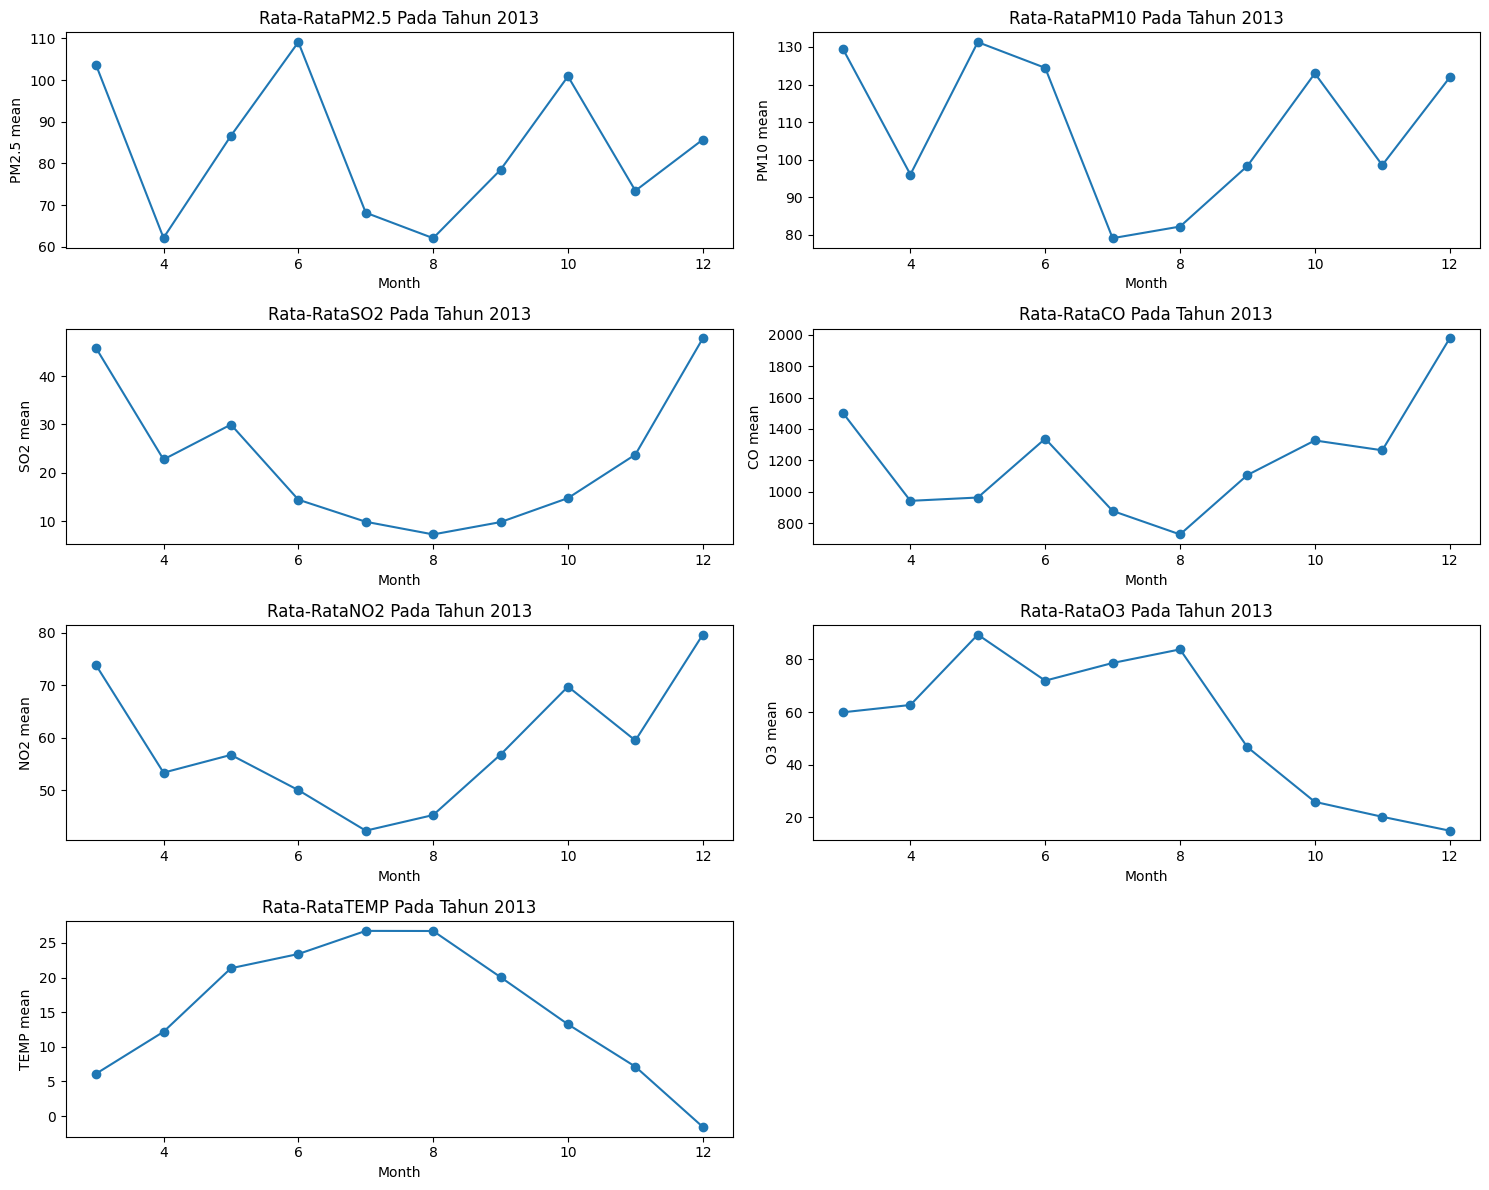

In [ ]:
data_2013=visual.loc[2013]

variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]
fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2013.index,data_2013[var],marker='o')
  axes[i].set_title(f'Rata-Rata {var} Pada Tahun 2013')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Visualisasi pada tahun 2014

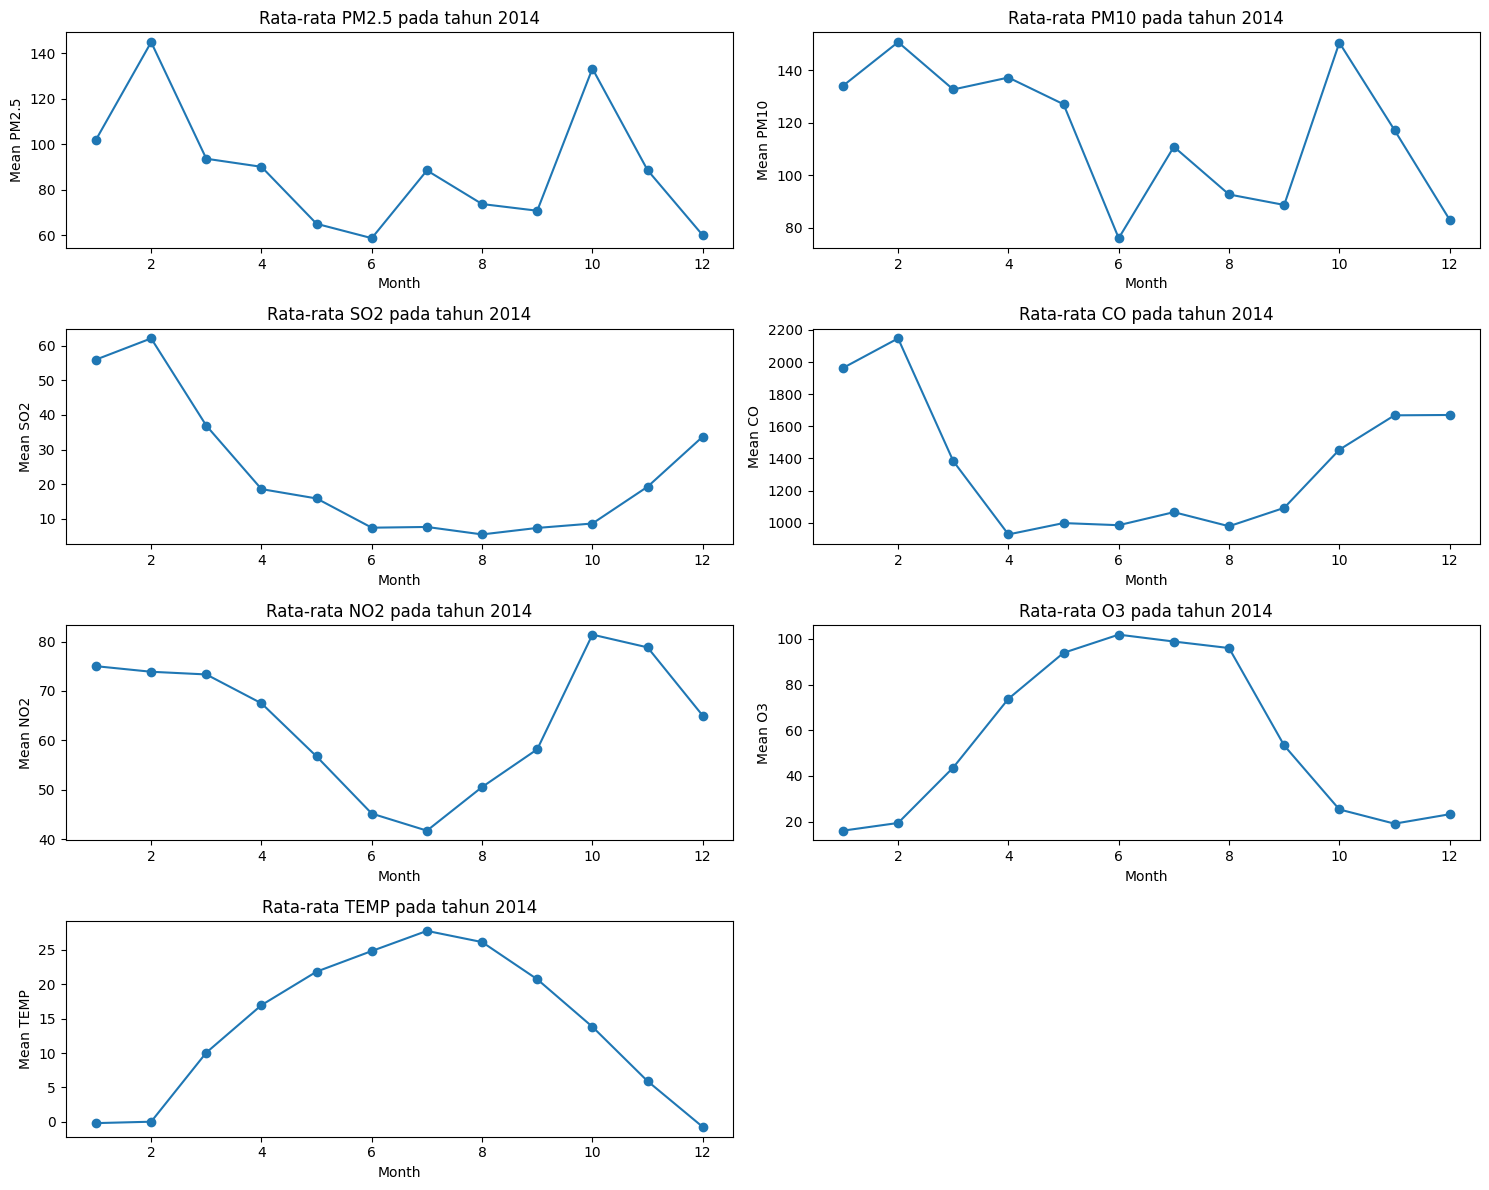

In [ ]:
data_2014=visual.loc[2014]
variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]
fig,axes= plt.subplots(4,2,figsize=(15,12))

axes=axes.flatten()
for i,var in enumerate (variables):
  axes[i].plot(data_2014.index,data_2014[var],marker="o")
  axes[i].set_title(f'Rata-rata {var} pada tahun 2014')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'Mean {var}')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Visualisasi pada tahun 2015

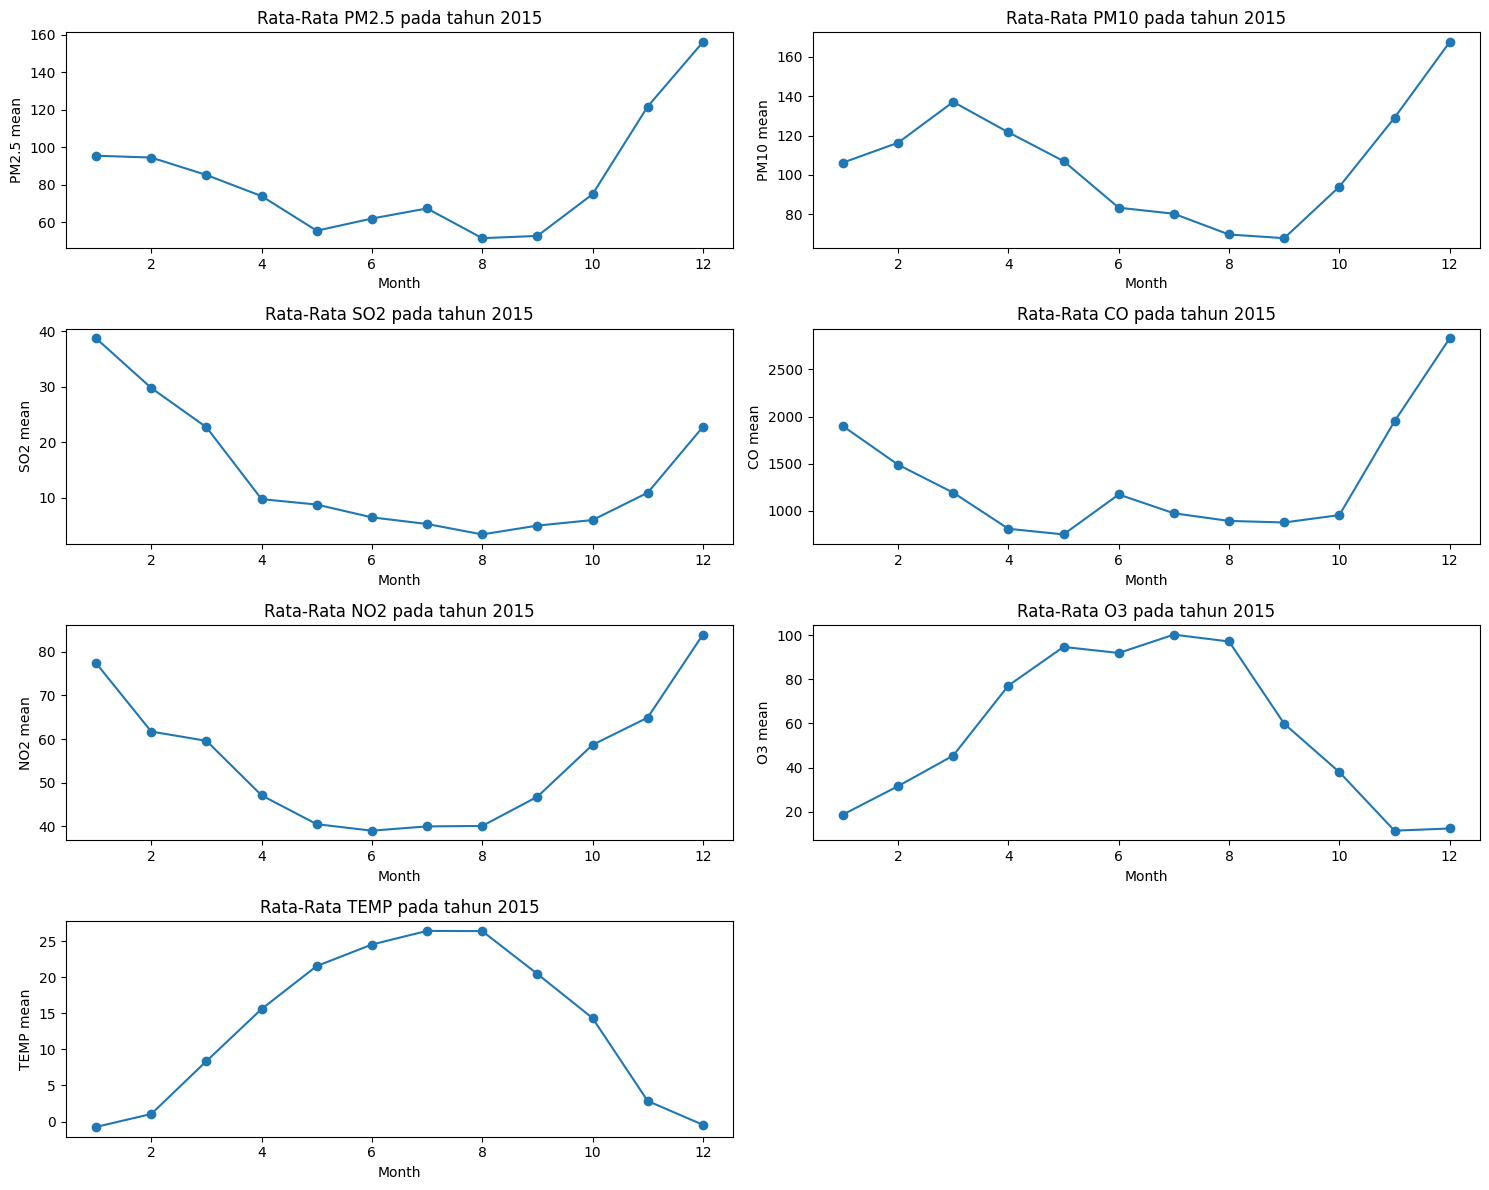

In [ ]:
data_2015=visual.loc[2015]

variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]

fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i,var in enumerate (variables):
  axes[i].plot(data_2015.index,data_2015[var],marker="o")
  axes[i].set_title(f'Rata-Rata {var} pada tahun 2015')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')


fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


Data tahun 2016

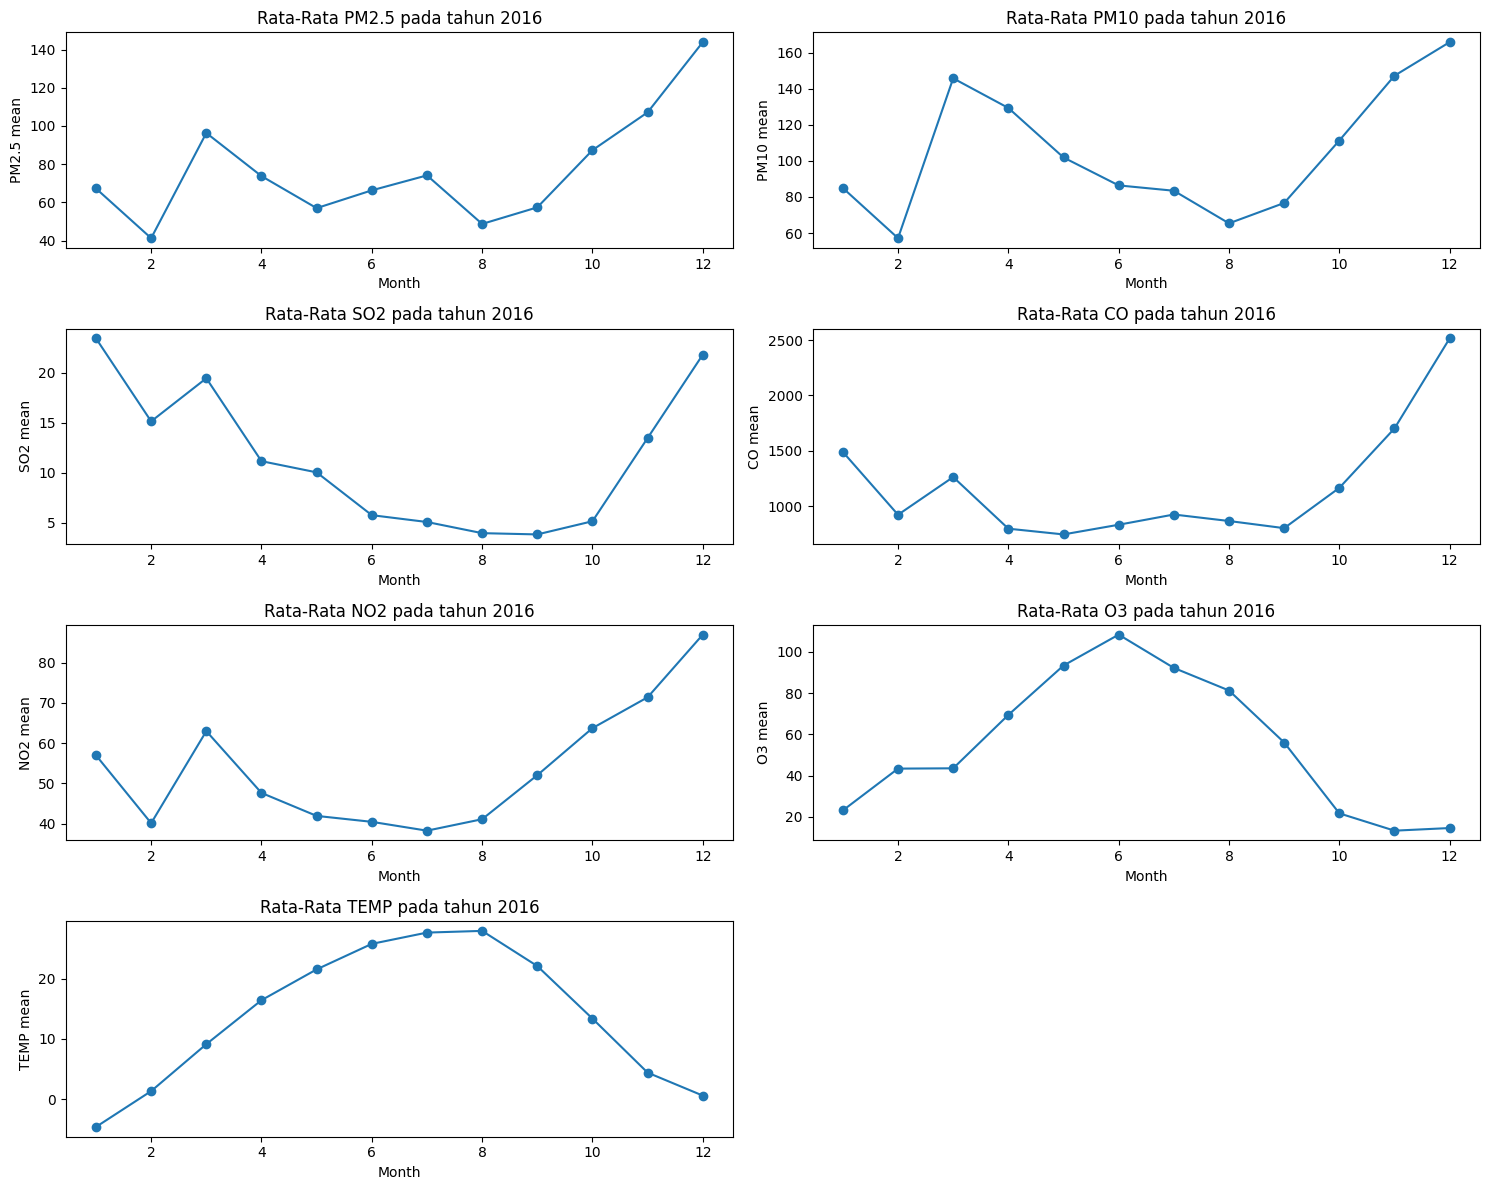

In [ ]:
data_2016=visual.loc[2016]

variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]

fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2016.index,data_2016[var],marker="o")
  axes[i].set_title(f'Rata-Rata {var} pada tahun 2016')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Data Tahun 2017

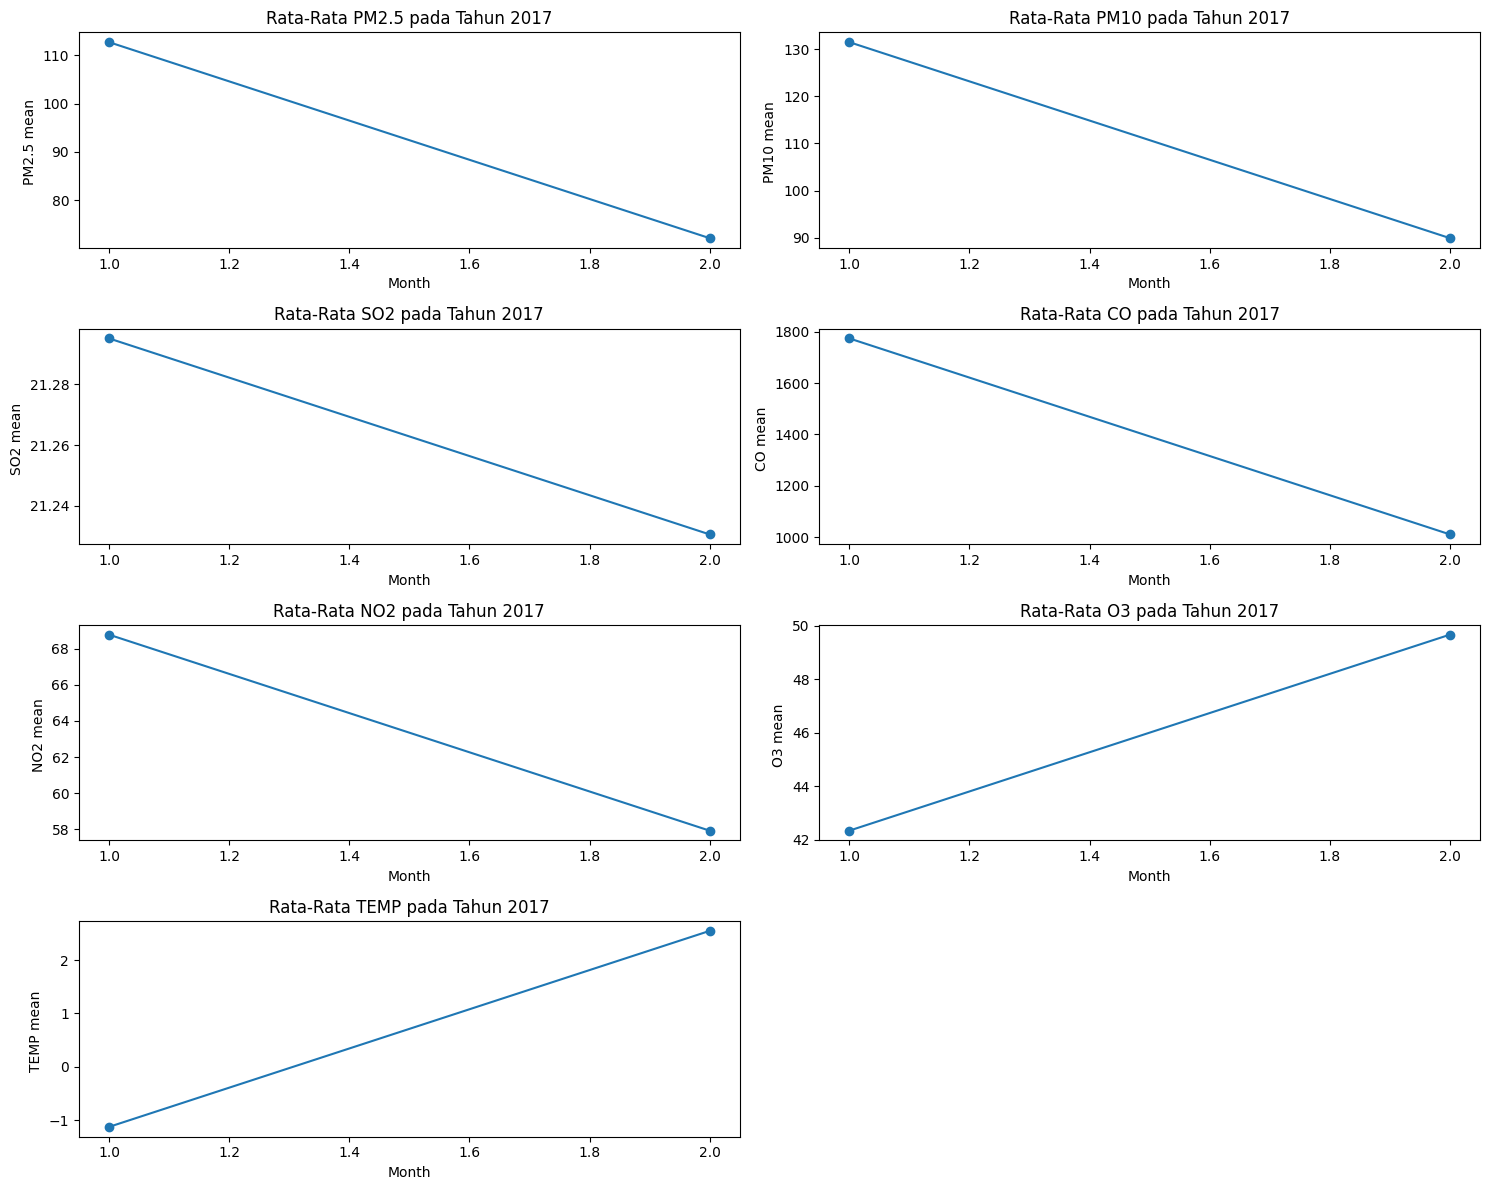

In [ ]:
data_2017=visual.loc[2017]
variables=["PM2.5","PM10","SO2","CO","NO2","O3","TEMP"]
fig,axes=plt.subplots(4,2,figsize=(15,12))
axes=axes.flatten()

for i,var in enumerate (variables):
  axes[i].plot(data_2017.index,data_2017[var],marker="o")
  axes[i].set_title(f'Rata-Rata {var} pada Tahun 2017')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean ')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Pertanyaan 2:Apa saja parameter yang berhubungan terhadap kualitas udara di kota Guanyuan

Menentukan korelasi setiap faktor kualitas udara di kota Guanyuan

In [ ]:
core=airqu_df[['PM2.5','PM10','SO2','O3','CO','NO2','TEMP','WSPM']]
core.corr()

,PM2.5,PM10,SO2,O3,CO,NO2,TEMP,WSPM
PM2.5,1.000000,0.897309,0.492045,-0.145761,0.800624,0.693883,-0.133084,-0.285300
PM10,0.897309,1.000000,0.472098,-0.105211,0.713095,0.660255,-0.095603,-0.194396
SO2,0.492045,0.472098,1.000000,-0.181543,0.568284,0.523129,-0.361197,-0.136197
O3,-0.145761,-0.105211,-0.181543,1.000000,-0.309041,-0.511333,0.611711,0.304000
CO,0.800624,0.713095,0.568284,-0.309041,1.000000,0.733687,-0.312413,-0.308973
NO2,0.693883,0.660255,0.523129,-0.511333,0.733687,1.000000,-0.324611,-0.455277
TEMP,-0.133084,-0.095603,-0.361197,0.611711,-0.312413,-0.324611,1.000000,0.024770
WSPM,-0.285300,-0.194396,-0.136197,0.304000,-0.308973,-0.455277,0.024770,1.000000


Melakukan visualisasi kadar kosentrasi CO dengan kadar PM2.5 dan PM10

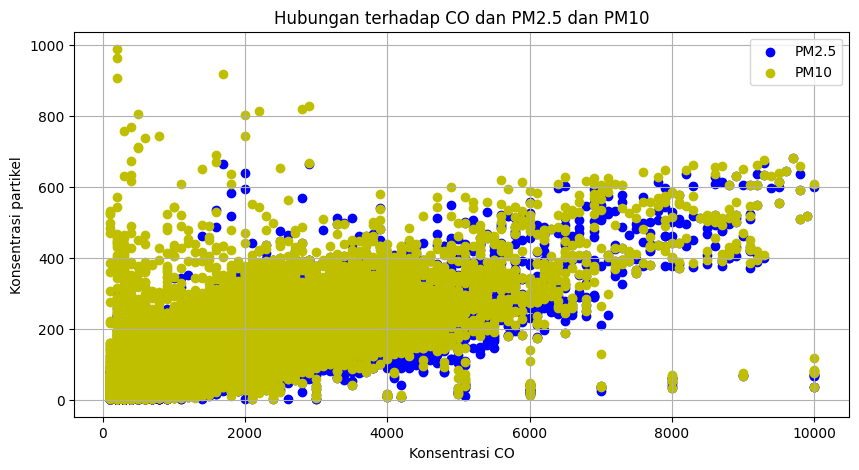

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(airqu_df['CO'],airqu_df['PM2.5'],marker='o',linestyle='-',color='b',label='PM2.5')
plt.scatter(airqu_df['CO'],airqu_df['PM10'],marker='o',linestyle='-',color='y',label='PM10')

plt.title('Hubungan terhadap CO dan PM2.5 dan PM10')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Konsentrasi partikel')

plt.legend()
plt.grid()
plt.show()

**Insight:**
- Faktor yang mempengaruhi nilai CO adalah PM2.5 dan PM10
- Dalam 5 tahun terakhir terdapat faktor yang mengalami kenaikan yaitu pada tahun 2016 kenaikan kadar CO dan PM2.5 yang dapat mempengaruhi kualitas udara

## Analisis Lanjutan (Opsional)

## Conclusion

- Setelah dilakukan visualisasi year terhadap faktor kualitas udara yaitu PM2.5,PM10,SO2,CO,O3,TEMP,PRES terdapat faktor yang terlihat mencolok yaitu kadar CO ,PM2.5 dan PM10
- Setelah dilakukan visualisasi scatter plot bahwa konsentrasi CO memiliki korelasi dengan CO,PM2.5 dan PM10 yang dapat dilihat bahwa semakin ke kanan maka kadar PM2.5 dan PM10 mengalami kenaikan juga